# Esercitazione 9

**29 Aprile 2024**

*Gradiente e gradiente coniugato*

## Esercizio 1
Implementare la funzione **steepestdescent(A,b,x0,itmax,tol)** che implementa il metodo di discesa più ripida del gradiente per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione

- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [3]:
def steepdescent(A, b, x0, itmax, tol):
    all_xk = []
    vett = []
    errore = 1000
    
    it = 0
    '''
    p0 = -A@x0+b
    r0 = -p0.copy()
    a0 = (r0@r0.T)/(A@r0@r0.T) # a0 è uno scalare
    x1 = x0 + a0*r0
    #r1 = r0 + a0*A@p0
    all_xk.append(x1)
    
    x0 = x1
    r0 = r1
    '''
    
    while (it < itmax and errore >= tol):

        p0 = -A@x0+b
        r0 = -p0.copy()
        a0 = (r0.T@r0)/((A@r0).T@r0) # a0 è uno scalare
        x1 = x0 + a0*p0
        #r1 = r0 + a0*A@p0
        all_xk.append(x1)
        
        errore = np.linalg.norm(r0, 2)/np.linalg.norm(b, 2)
        vett.append(errore)
        
        x0 = x1
        
        it += 1
        
    
    return x1, vett, all_xk, it

In [10]:
def steepestdescent2(A,b,x0,itmax,tol):
 
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0

     
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
    # utilizzare il metodo del gradiente per trovare la soluzione
    while it < itmax and errore > tol:
        it=it+1
        Ap=A@p
       
        alpha = (r.T@r)/((A@r).T@r)
        x = x+alpha*p
         
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -A@x + b
        
     
    return x,vet_r,vec_sol,it

## Esercizio 1-Bis
Implementare la funzione **steepestdescent_CL(A,b,x0,itmax,X,Y,Z,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k.

N.B: f(x) è il funzionale quadratico da minimizzare (f(x)= $ \frac{1} {2}$*<Ax,x>-<b,x>) ,
X,Y sono la discretizzazione del piano su cui costruire Z (ottenuta valutando f sui punti della griglia)

In [6]:
def f (x, A, b):
    AxTx = (A@x).T@x
    bTx = b.T@x
    
    return 0.5*AxTx-bTx

In [40]:
def steepestdescent_CL(A,b,x0,itmax,X,Y,Z,tol):
    all_xk = []
    vett = []
    errore = 1000
    
    it = 0
    '''
    p0 = -A@x0+b
    r0 = -p0.copy()
    a0 = (r0@r0.T)/(A@r0@r0.T) # a0 è uno scalare
    x1 = x0 + a0*r0
    #r1 = r0 + a0*A@p0
    all_xk.append(x1)
    
    x0 = x1
    r0 = r1
    '''
    
    
    while (it < itmax and errore >= tol):

        p0 = -A@x0+b
        r0 = -p0.copy()
        a0 = (r0.T@r0)/((A@r0).T@r0) # a0 è uno scalare
        x1 = x0 + a0*p0
        # disegno la curva di livello
        # levels vuole che sia in una solo quadra, quindi viene fatto .flatten()
        plt.contour(X, Y, Z, levels=f(x1,A,b).flatten())
         # disegniamo il punto
        plt.plot(x1[0],x1[1], 'ro')
        #r1 = r0 + a0*A@p0
        all_xk.append(x1)
        
        errore = np.linalg.norm(r0, 2)/np.linalg.norm(b, 2)
        vett.append(errore)
        
        x0 = x1
        
        it += 1
        
    plt.show()
    return x1, vett, all_xk, it

## Esercizio 2
Implementare la funzione **conjugate_gradient(A,b,x0,itmax,tol)** che implementa il metodo del gradiente coniugato per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione
- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

In [2]:
def conjugate_gradient(A, b, x0, itmax, tol):
    all_xk = []
    vett = []
    errore = 1000
    
    r0 = A@x0-b
    p0 = -r0
    
    it = 0
    
    while (it < itmax and errore >= tol):

        a0 = (r0.T@r0)/((A@p0).T@p0) # a0 è uno scalare
        x1 = x0 + a0*p0
        r1 = r0 + a0*A@p0
        all_xk.append(x1)
        
        errore = np.linalg.norm(r1, 2)/np.linalg.norm(b, 2)
        vett.append(errore)
        
        gamma = (r1.T@r1)/(r0.T@r0)
        p1 = -r1 + gamma*p0
        
        x0 = x1
        r0 = r1
        p0 = p1
        
        it += 1
        
    return x1, vett, all_xk, it

## Esercizio 2-Bis
Implementare la funzione **conjugate_gradient_CL(A,b,x0,itmax,X,Y,Z,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k

In [51]:
def conjugate_gradient_CL(A,b,x0,itmax,X,Y,Z,tol):
    all_xk = []
    vett = []
    errore = 1000
    
    r0 = A@x0-b
    p0 = -r0
    plt.contour(X, Y, Z, levels=f(x0,A,b).flatten())
    # disegniamo il punto
    plt.plot(x0[0],x0[1], 'ro')
    
    it = 0
    
    while (it < itmax and errore >= tol):

        a0 = (r0.T@r0)/((A@p0).T@p0) # a0 è uno scalare
        x1 = x0 + a0*p0
        r1 = r0 + a0*A@p0
        plt.contour(X, Y, Z, levels=f(x1,A,b).flatten())
        # disegniamo il punto
        plt.plot(x1[0],x1[1], 'ro')
        all_xk.append(x1)
        
        errore = np.linalg.norm(r1, 2)/np.linalg.norm(b, 2)
        vett.append(errore)
        
        gamma = (r1.T@r1)/(r0.T@r0)
        p1 = -r1 + gamma*p0
        
        x0 = x1
        r0 = r1
        p0 = p1
        
        it += 1
        
    plt.show()
    return x1, vett, all_xk, it

In [11]:
# dati di testing
A=np.array([[8,4],[4,3]])
b=np.array([8,10])
x0=[0,0]
itmax=200
tol=1e-10

x = np.linspace(-7.0,3.0,100)
y = np.linspace(-5.0,14.0,100)
X, Y = np.meshgrid(x,y)
Z = np.zeros_like(X)

# in questi cicli creo il grafico calcolando gli Z
for i in range(len(y)):
    # di solito si deve evitare il doppio ciclo
    for j in range(len(x)):
        x_coor = X[i][j]
        y_coor = Y[i][j]
        Z[i][j] = f(np.array([[x_coor],[y_coor]]), A, b)

print(steepdescent(A, b, x0, itmax, tol))
print("Metodo del Gradiente RIFATTO")
print(steepestdescent2(A,b,x0,itmax,tol))

#print(steepestdescent_CL(A,b,x0,itmax,X,Y,Z,tol))

#print(conjugate_gradient(A, b, x0, itmax, tol))

#print(conjugate_gradient_CL(A,b,x0,itmax,X,Y,Z,tol))


(array([-2.,  6.]), [1.0, 0.3746556473829201, 0.579013273228149, 0.21693059272459583, 0.33525637057437546, 0.12560569255679077, 0.19411788849685832, 0.07272736318339595, 0.11239683401070331, 0.04211010861007015, 0.06507925876101801, 0.024382311822309544, 0.037681754634478364, 0.014117682177105066, 0.021818236091889362, 0.00817432536776066, 0.012633048295629662, 0.004733042887619164, 0.00731470264450243, 0.0027404946546895586, 0.004235309920883688, 0.0015867827802762738, 0.0024523006604270986, 0.00091876829150953, 0.0014199146323330793, 0.0005319790358051036, 0.0008221494189716972, 0.00030802292280984744, 0.00047603542616089583, 0.00017834936076562916, 0.0002756308302737288, 0.00010326664715512242, 0.00015959390923946681, 5.9792759384830326e-05, 9.240699177612074e-05, 3.462080132688436e-05, 5.350487477790826e-05, 2.004590349778442e-05, 3.0980032678892346e-05, 1.1606844198717754e-05, 1.793785012579129e-05, 6.720516850751255e-06, 1.0386253315348812e-05, 3.891268459519966e-06, 6.0137785288

## Test didattici per il caso n=2, visualizzando le curve di livello

Risolvere il sistema lineare Ax=b, dove A=np.array([[8,4],[4,3]]) e b=np.array([8,10]), utilizzando
il metodo del gradiente e del gradiente coniugato con la visualizzazione grafica delle curve di livello e della soluzione ad ogni iterazione. Si selezioni l'iterato iniziale x0=[0,0], itmax=200
tol=1e-10. Si confrontino le iterazioni effettuate da ciascuno dei due metodi e si visualizzi  $ \frac{||r^{(k)}||_2} {||b||_2}$ ad ogni iterazione.

## Esercizio 3
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$

- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson con ordine che va da 10 a 100 con step 2,  e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo del gradiente e del gradiente coniugato  

In [62]:
def creaPoisson(n):
    all_four = np.diag(np.ones(n)*4)
    one_up = np.eye(n, k=1)*-1
    one_down = np.eye(n, k=-1)*-1
    
    fin_res = all_four + one_up + one_down
    
    if (n>=4):
        d_one_up = np.eye(n, k=3)*-1
        d_one_down = np.eye(n, k=-3)*-1
        
        fin_res = all_four + one_up + one_down + d_one_up + d_one_down
    
    
    return fin_res

In [79]:
#print(creaPoisson(10))

itmax=200
tol=1e-10

for n in range(10, 10+2, 2):
    A = creaPoisson(n)
    b = np.sum(A,axis=1).reshape(A.shape[0],1)
    x0 = np.zeros_like(b)
    
    x_G_0,vet_r_G_0,vec_sol_G,itG_0=steepdescent(A,b,x0,itmax,tol)
    x_J_0,vet_r_J_0,vec_sol_J,itJ_0=conjugate_gradient(A,b,x0,itmax,tol)
    print("n = ", n, "soluzione gradiente =", x_G_0)
    print("n = ", n, "soluzione gradiente coniugato =", x_J_0)

n =  10 soluzione gradiente = [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
n =  10 soluzione gradiente coniugato = [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


## Esercizio 4
Consideriamo il sistema lineare Ax=b  dov A è  la matrice di Hilbert di dimensione 5, costruita usando la funzione hilbert(n) di scipy.linalg (A=scipy.linalg.hilbert(5)) in modo tale che la soluzione esatta sia $x = (1, 1, . . . , 1)^T$ .
Risolvere il sistema lineare usando sia il metodi del gradiente che il metodo del gradiente coniugato e confrontarne gli errori ad ogni iterazione.

[[1.00057987]
 [0.99493716]
 [1.00629286]
 [1.00657604]
 [0.99103314]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


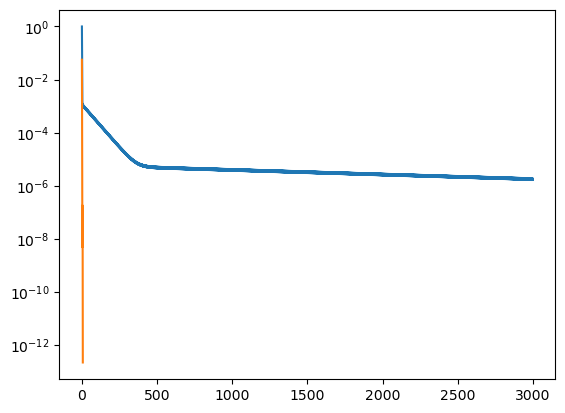

In [18]:
A=scipy.linalg.hilbert(5)
b=np.sum(A, axis=1).reshape(A.shape[0],1)
x0=np.zeros_like(b)
x1=np.ones_like(b)
itmax=3000
tol=1e-10

xG, vettG, all_xkG, itG = steepdescent(A, b, x0, itmax, tol)
print(xG)
xC, vettC, all_xkC, itC = conjugate_gradient(A, b, x0, itmax, tol)
print(xC)

err_rel_grad = [ np.linalg.norm( x1 - all_xkG[i], 2)/np.linalg.norm(x1, 2) for i in range(len(all_xkG)) ]
err_rel_con = [ np.linalg.norm( x1 - all_xkC[i], 2)/np.linalg.norm(x1, 2) for i in range(len(all_xkC)) ]

plt.semilogy(range(itG),vettG)
plt.semilogy(range(itC),vettC)

## Esercizio 5
Importare il file creaG ed utilizzare le funzioni sottospecificate per creare, scelto $n$,  una matrice D di ordine $m=(n-2)^2$

*import creaG*

*G = creaG.numgrid(n)*

*D = creaG.delsq(G).todense().getA()*

Risolvere il sistema lineare Dx=b, con matrice G di ordine m=16 ed ordine m=400, (scegliere n in maniera opportuna), usando i metodi del gradiente e del gradiente coniugato. Confrontare gli errori su uno stesso grafico e giustifcare i risultati alla luce del risultato teorico della maggiorazione dell'errore per entrambi i metodi

Ordine grandezza matrice G = 16
Indice di condizionamento della matrice : 9.47213595499958


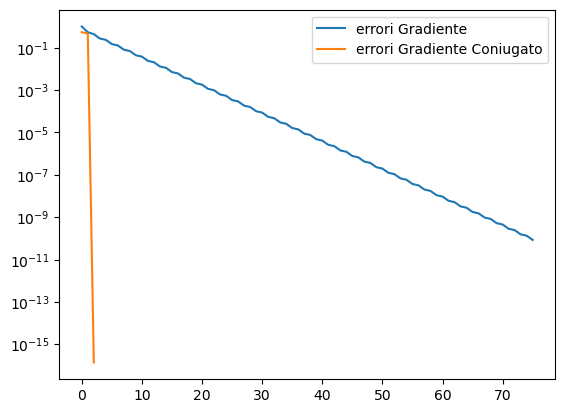

In [38]:
import creaG
# come ricavare n in modo opportuno: n = sqrt(m) + 2 
n = 6
G = creaG.numgrid(n)

D = creaG.delsq(G).todense().getA()
print("Ordine grandezza matrice G =", D.shape[0])
print("Indice di condizionamento della matrice :", np.linalg.cond(D))

b = np.sum(D, axis=1).reshape(D.shape[0],1)
x0 = np.zeros_like(b)
itmax=500
tol=1e-10

xG, vettG, all_xkG, itG = steepdescent(D, b, x0, itmax, tol)
xC, vettC, all_xkC, itC = conjugate_gradient(D, b, x0, itmax, tol)
#print(itG)
#print(itC)

plt.semilogy(range(itG),vettG)
plt.semilogy(range(itC),vettC)
plt.legend(['errori Gradiente', 'errori Gradiente Coniugato'])


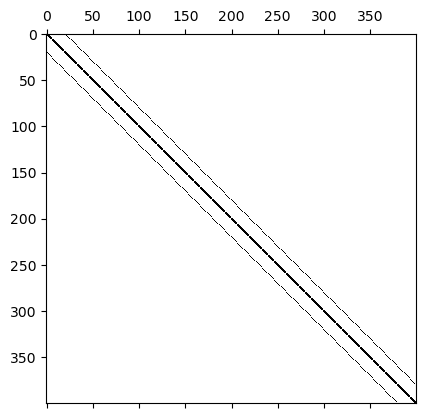

Ordine grandezza matrice G = 400
Indice di condizionamento della matrice : 178.06427461085988


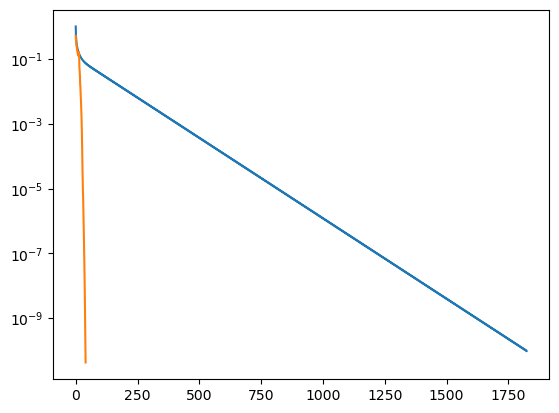

In [37]:
n = 22
G = creaG.numgrid(n)

D = creaG.delsq(G).todense().getA()
plt.spy(D)  #Visualizza la matrice: in bianco i valori nulli, in nero i valori diversi da zero
plt.show()
print("Ordine grandezza matrice G =", D.shape[0])
print("Indice di condizionamento della matrice :", np.linalg.cond(D))

b = np.sum(D, axis=1).reshape(D.shape[0],1)
x0 = np.zeros_like(b)
itmax=2000
tol=1e-10

xG, vettG, all_xkG, itG = steepdescent(D, b, x0, itmax, tol)
xC, vettC, all_xkC, itC = conjugate_gradient(D, b, x0, itmax, tol)
#print(itG)
#print(itC)

plt.semilogy(range(itG),vettG)
plt.semilogy(range(itC),vettC)